In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

# Analyse prices (bid/ask)

In [2]:
# Load the three CSV files
day_0 = pd.read_csv("data/prices_round_1_day_0.csv",  sep=';')
day_minus_1 = pd.read_csv("data/prices_round_1_day_-1.csv",  sep=';')
day_minus_2 = pd.read_csv("data/prices_round_1_day_-2.csv",  sep=';')

# Combine all days into a single dataframe
all_data = pd.concat([day_minus_2, day_minus_1, day_0], ignore_index=True)


all_data["timestamp_update"] = (all_data["timestamp"]) + ((all_data["day"]+2) * 1000000)
all_data.sort_values(by=["timestamp_update"], inplace=True)
all_data.drop(columns=["timestamp", "day"], inplace=True)

In [3]:
# Create a copy of the filtered DataFrames to avoid the SettingWithCopyWarning
data_KELP = all_data[all_data['product'] == 'KELP'].copy()
data_KELP.drop(columns=["product"], inplace=True)
data_KELP.sort_values(by=["timestamp_update"], inplace=True)
data_KELP.drop(columns=["timestamp_update"], inplace=True)
data_KELP.reset_index(drop=True, inplace=True)

data_RAINFOREST_RESIN = all_data[all_data['product'] == 'RAINFOREST_RESIN'].copy()
data_RAINFOREST_RESIN.drop(columns=["product"], inplace=True)
data_RAINFOREST_RESIN.sort_values(by=["timestamp_update"], inplace=True)
data_RAINFOREST_RESIN.drop(columns=["timestamp_update"], inplace=True)
data_RAINFOREST_RESIN.reset_index(drop=True, inplace=True)

data_SQUID_INK = all_data[all_data['product'] == 'SQUID_INK'].copy()
data_SQUID_INK.drop(columns=["product"], inplace=True)
data_SQUID_INK.sort_values(by=["timestamp_update"], inplace=True)
data_SQUID_INK.drop(columns=["timestamp_update"], inplace=True)
data_SQUID_INK.reset_index(drop=True, inplace=True)

## Analysis RESIN

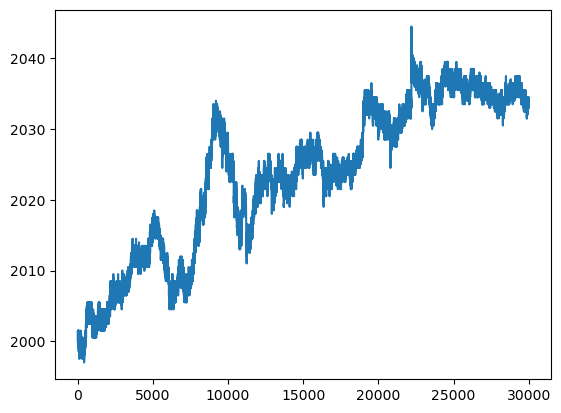

In [4]:
series = data_KELP['mid_price']
plt.plot(series)

In [6]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import arma_order_select_ic
import matplotlib.pyplot as plt



# Use arma_order_select_ic to find best (p,q)
result = arma_order_select_ic(series, max_ar=3, max_ma=3, ic=['aic', 'bic'], trend='n')

print("Best order by AIC:", result.aic_min_order)
print("Best order by BIC:", result.bic_min_order)

# Optional: see all AIC/BIC values
print("\nAIC matrix:\n", result.aic)
print("\nBIC matrix:\n", result.bic)


c:\Users\cam42\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\cam42\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\cam42\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\cam42\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\cam42\miniconda3\Lib\site-packages\statsmodels\base\model.py:

Best order by AIC: (3, 3)
Best order by BIC: (2, 3)

AIC matrix:
                0              1              2              3
0  541893.522221  500359.227379  478446.969046  460372.871280
1   70371.286702   58030.670106   57876.234142   58089.577337
2   71668.091941   68230.397908   57530.272410   57433.919104
3   73305.289350   62594.023969   57709.773232   57426.029678

BIC matrix:
                0              1              2              3
0  541901.831174  500375.845284  478471.895904  460406.107091
1   70387.904608   58055.596964   57909.469952   58131.122101
2   71693.018798   68263.633719   57571.817173   57483.772820
3   73338.525161   62635.568732   57759.626948   57484.192346


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import arma_order_select_ic
import matplotlib.pyplot as plt



# Use arma_order_select_ic to find best (p,q)
result = arma_order_select_ic(series, max_ar=3, max_ma=3, ic=['aic', 'bic'], trend='c')

print("Best order by AIC:", result.aic_min_order)
print("Best order by BIC:", result.bic_min_order)

# Optional: see all AIC/BIC values
print("\nAIC matrix:\n", result.aic)
print("\nBIC matrix:\n", result.bic)


In [ ]:
### for simplicity we just suppose the model is a arma(1,1)

## Analysis KELP - BID

### Values

In [4]:
print(data_KELP.drop(columns=["profit_and_loss", "mid_price"]).describe())

        bid_price_1  bid_volume_1  bid_price_2  bid_volume_2  bid_price_3  \
count  30000.000000  30000.000000  6425.000000   6425.000000   496.000000   
mean    2022.120367     21.271167  2021.857743     24.277354  2021.897177   
std       10.896350     10.224982    10.890960      6.934579    10.985735   
min     1996.000000      1.000000  1996.000000      1.000000  1997.000000   
25%     2013.000000     21.000000  2013.000000     22.000000  2013.000000   
50%     2024.000000     25.000000  2023.000000     26.000000  2023.000000   
75%     2032.000000     28.000000  2032.000000     29.000000  2032.000000   
max     2043.000000     40.000000  2038.000000     40.000000  2037.000000   

       bid_volume_3   ask_price_1  ask_volume_1  ask_price_2  ask_volume_2  \
count    496.000000  30000.000000  30000.000000  7722.000000   7722.000000   
mean      25.423387   2024.832567     20.196867  2025.183372     23.792800   
std        4.351033     10.917679     10.242083    10.936716      7.2175

In [18]:
import matplotlib.pyplot as plt

# Helper function for line plots
def plot_lines(ax, x, columns, title, y_label):
    for col in columns:
        ax.plot(x, data_KELP[col], label=col)
    ax.set_title(title)
    ax.set_xlabel("Index")
    ax.set_ylabel(y_label)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

# Helper function for bar plots (histograms)
def plot_bars(ax, x, columns, title, y_label, alphas=(0.7, 0.5)):
    for i, col in enumerate(columns):
        # Cycle through alphas if more than two columns
        ax.bar(x, data_KELP[col], label=col, alpha=alphas[i % len(alphas)])
    ax.set_title(title)
    ax.set_xlabel("Index")
    ax.set_ylabel(y_label)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

# Get the x-axis data (assumed to be the dataframe index)
x = data_KELP.index

# Identify relevant columns using list comprehensions
bid_price_cols = [col for col in data_KELP.columns if col.startswith('bid_price_1')]
ask_price_cols = [col for col in data_KELP.columns if col.startswith('ask_price_1')]
bid_volume_cols = [col for col in data_KELP.columns if col.startswith('bid_volume_1')]
ask_volume_cols = [col for col in data_KELP.columns if col.startswith('ask_volume_1')]

# Create a figure with 4 subplots arranged vertically
fig, axs = plt.subplots(4, 1, figsize=(15, 20))

# Plot Bid Prices using line plots
plot_lines(axs[0], x, bid_price_cols, "Bid Prices", "Price")

# Plot Bid Volumes as histograms (using the first two volume columns, if available)
plot_bars(axs[1], x, bid_volume_cols[:2], "Bid Volumes", "Volume")

# Plot Ask Prices using line plots
plot_lines(axs[2], x, ask_price_cols, "Ask Prices", "Price")

# Plot Ask Volumes as histograms (using the first two volume columns, if available)
plot_bars(axs[3], x, ask_volume_cols[:2], "Ask Volumes", "Volume")

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

c:\Users\cam42\miniconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


: 

: 

Best VWAP Performance:
R-squared: 0.9938
Window Size: 25
Price Column: bid_price_1
Volume Column: bid_volume_1


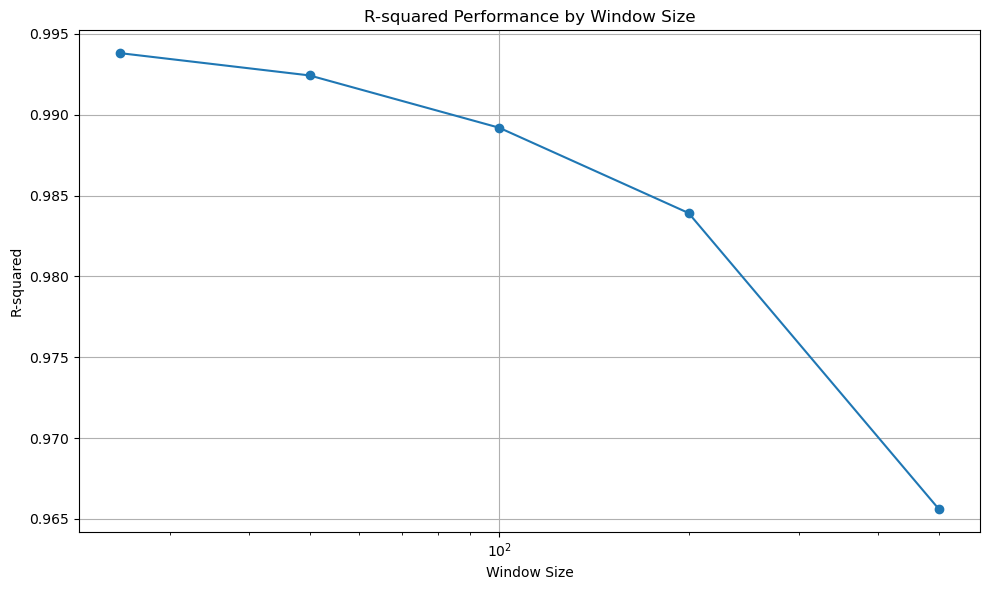

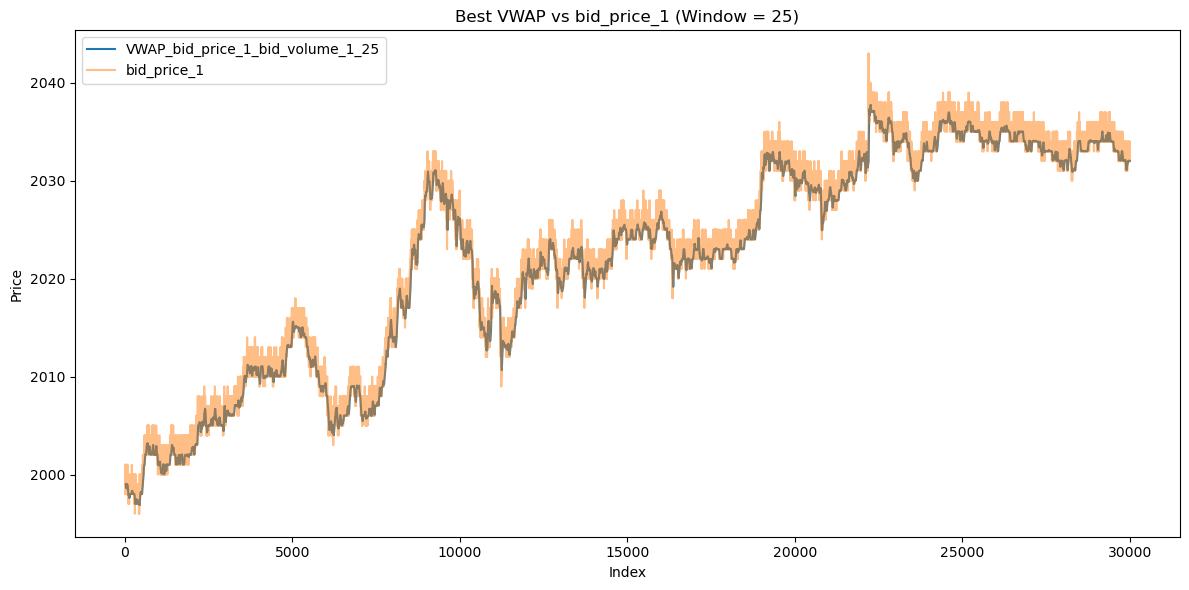

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Calculate VWAPs for different window sizes
def calculate_vwap(df, price_col, volume_col, window):
    vwap = (df[price_col] * df[volume_col]).rolling(window=window).sum() / \
           df[volume_col].rolling(window=window).sum()
    return vwap

# Prepare data for prediction (feature at time t and target at time t+1)
def prepare_prediction_data(df, vwap_cols, target_col):
    X = df[vwap_cols].values[:-1]
    y = df[target_col].values[1:]
    return X, y

# Evaluate VWAP prediction performance using linear regression
def evaluate_vwap_prediction(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'Coefficients': model.coef_
    }

# Define window sizes to test
window_sizes = [25, 50, 100, 200, 500]

# List the paired columns (only two pairs: bid and ask)
price_volume_pairs = [
    ('bid_price_1', 'bid_volume_1'),
    ('ask_price_1', 'ask_volume_1')
]

# Prepare to store performance results for each pair and window size
performance_results = []
best_performance = {
    'best_r2': -np.inf,
    'best_window': None,
    'best_price_col': None,
    'best_volume_col': None
}

# Loop over each price-volume pair
for price_col, volume_col in price_volume_pairs:
    # Set the target column to be the current price_col
    target_col = price_col
    
    for window in window_sizes:
        # Create a unique name for the VWAP column
        vwap_col_name = f'VWAP_{price_col}_{volume_col}_{window}'
        data_KELP[vwap_col_name] = calculate_vwap(data_KELP, price_col, volume_col, window)
        
        # Drop missing values that may appear due to rolling calculations
        data_clean = data_KELP.dropna(subset=[vwap_col_name, target_col])
        
        # Prepare features and target for prediction
        X, y = prepare_prediction_data(data_clean, [vwap_col_name], target_col)
        
        # Ensure there's enough data to evaluate the model
        if len(X) > 0:
            results = evaluate_vwap_prediction(X, y)
            
            # Store the performance results
            result_entry = {
                'price_col': price_col,
                'volume_col': volume_col,
                'window': window,
                'MSE': results['MSE'],
                'MAE': results['MAE'],
                'R2': results['R2']
            }
            performance_results.append(result_entry)
            
            # Update best performance if this is the highest R2 so far
            if results['R2'] > best_performance['best_r2']:
                best_performance['best_r2'] = results['R2']
                best_performance['best_window'] = window
                best_performance['best_price_col'] = price_col
                best_performance['best_volume_col'] = volume_col

# Print detailed best performance results
print("Best VWAP Performance:")
print(f"R-squared: {best_performance['best_r2']:.4f}")
print(f"Window Size: {best_performance['best_window']}")
print(f"Price Column: {best_performance['best_price_col']}")
print(f"Volume Column: {best_performance['best_volume_col']}")

# Visualize performance across windows (using performance_results from last pair processed)
# Note: If you want to compare both pairs, you might need to separate plotting by pair.
# Here we show the R2 scores for the best pair.
windows = [entry['window'] for entry in performance_results 
           if entry['price_col'] == best_performance['best_price_col']]
r2_scores = [entry['R2'] for entry in performance_results 
           if entry['price_col'] == best_performance['best_price_col']]

plt.figure(figsize=(10, 6))
plt.plot(windows, r2_scores, marker='o')
plt.title('R-squared Performance by Window Size')
plt.xlabel('Window Size')
plt.ylabel('R-squared')
plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and plot the best VWAP alongside its price
best_vwap_col = f'VWAP_{best_performance["best_price_col"]}_{best_performance["best_volume_col"]}_{best_performance["best_window"]}'

plt.figure(figsize=(12, 6))
plt.plot(data_KELP.index, data_KELP[best_vwap_col], label=best_vwap_col)
plt.plot(data_KELP.index, data_KELP[best_performance["best_price_col"]], label=best_performance["best_price_col"], alpha=0.5)
plt.title(f'Best VWAP vs {best_performance["best_price_col"]} (Window = {best_performance["best_window"]})')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


VWAP columns: VWAP_bid_price_1_bid_volume_1_25


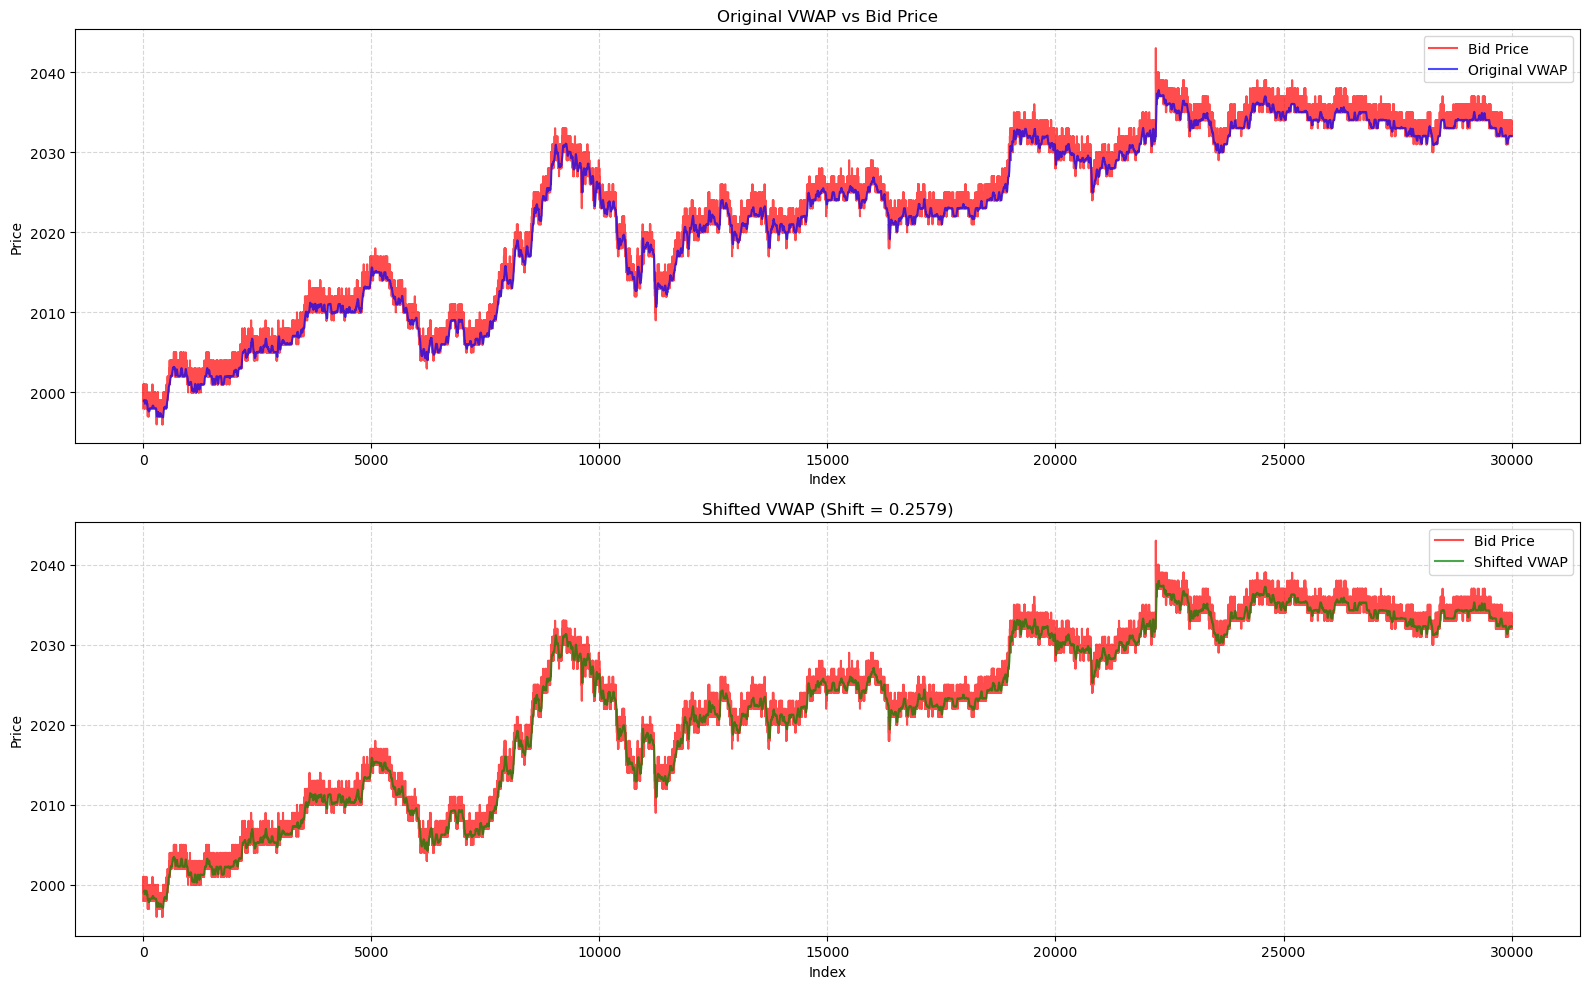

Optimal Shift: 0.2579
Original MSE: 0.7332
Shifted MSE: 0.6667
Improvement: 9.07%
Original Correlation: nan
Shifted Correlation: nan


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Function to calculate the mean squared error between shifted VWAP and bid price
def calculate_mse(a, vwap, bid_price):
    shifted_vwap = vwap + a
    return np.mean((shifted_vwap - bid_price)**2)

# Find the optimal shift
def find_optimal_shift(vwap, bid_price):
    result = minimize_scalar(lambda a: calculate_mse(a, vwap, bid_price))
    return result.x

# Identify the VWAP column
vwap_columns = [col for col in data_KELP.columns if col.startswith('VWAP_')]

vwap_col = "VWAP_bid_price_1_bid_volume_1_25"  # Choose the first VWAP column
print(f"VWAP columns: {vwap_col}")
# Calculate the optimal shift
optimal_shift = find_optimal_shift(data_KELP[vwap_col], data_KELP['bid_price_1'])

# Detailed visualization
plt.figure(figsize=(16, 10))

# Subplot 1: Original Data
plt.subplot(2, 1, 1)
plt.plot(data_KELP.index, data_KELP['bid_price_1'], label='Bid Price', color='red', alpha=0.7)
plt.plot(data_KELP.index, data_KELP[vwap_col], label='Original VWAP', color='blue', alpha=0.7)
plt.title('Original VWAP vs Bid Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Subplot 2: Shifted VWAP
plt.subplot(2, 1, 2)
plt.plot(data_KELP.index, data_KELP['bid_price_1'], label='Bid Price', color='red', alpha=0.7)
plt.plot(data_KELP.index, data_KELP[vwap_col] + optimal_shift, label='Shifted VWAP', color='green', alpha=0.7)
plt.title(f'Shifted VWAP (Shift = {optimal_shift:.4f})')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Calculate and print error metrics
original_mse = calculate_mse(0, data_KELP[vwap_col], data_KELP['bid_price_1'])
shifted_mse = calculate_mse(optimal_shift, data_KELP[vwap_col], data_KELP['bid_price_1'])

print(f"Optimal Shift: {optimal_shift:.4f}")
print(f"Original MSE: {original_mse:.4f}")
print(f"Shifted MSE: {shifted_mse:.4f}")
print(f"Improvement: {(original_mse - shifted_mse) / original_mse * 100:.2f}%")

# Calculate correlation before and after shifting
original_correlation = np.corrcoef(data_KELP[vwap_col], data_KELP['bid_price_1'])[0, 1]
shifted_correlation = np.corrcoef(data_KELP[vwap_col] + optimal_shift, data_KELP['bid_price_1'])[0, 1]

print(f"Original Correlation: {original_correlation:.4f}")
print(f"Shifted Correlation: {shifted_correlation:.4f}")

### Isolating noise

In [7]:
optimal_shift

0.2715505504489495

C:\Users\cam42\AppData\Local\Temp\ipykernel_13696\2439966733.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_KELP_fitted_df["noise"] = data_KELP_fitted_df["bid_price_1"] - data_KELP_fitted_df["fitted_values"]


count    29951.000000
mean         0.271551
std          0.927367
min         -4.795689
25%         -0.235518
50%          0.064742
75%          0.710827
max         10.960041
Name: noise, dtype: float64
Fitted parameters for Normal Distribution:
mu = 0.2716, sigma = 0.9274
Fitted parameters for Skew-Normal Distribution:
shape (a) = 2.0489, loc = -0.6502, scale = 1.3075


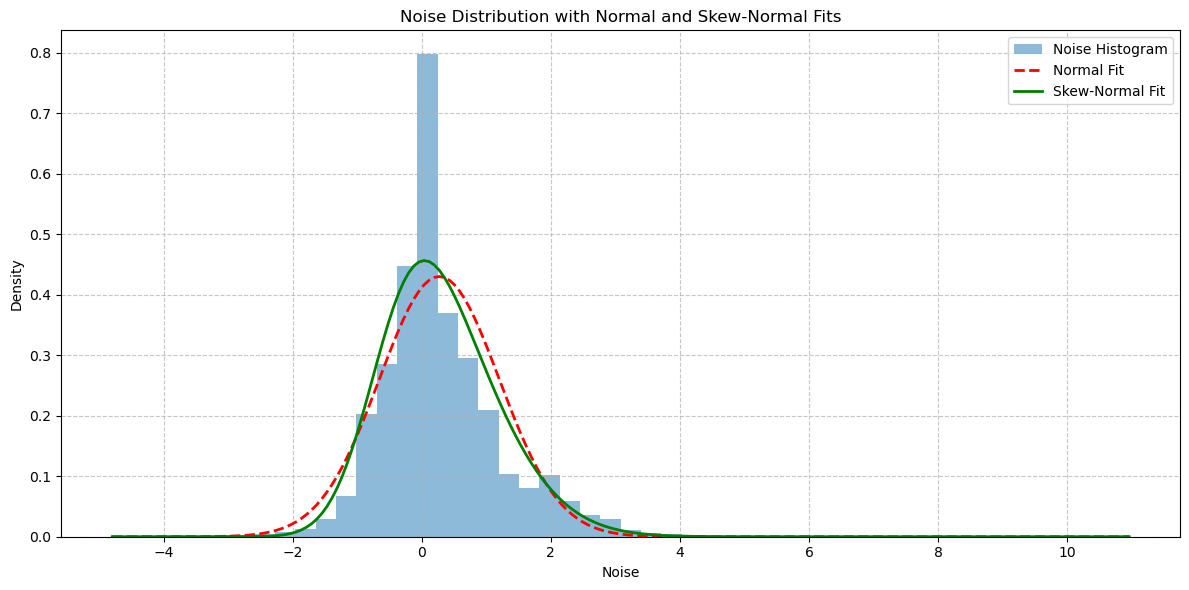


Kolmogorov-Smirnov Test Results:
Normal Distribution: D = 0.1008, p-value = 0.0000
Skew-Normal Distribution: D = 0.0739, p-value = 0.0000

Akaike Information Criterion (AIC):
Normal Distribution AIC: 80483.31
Skew-Normal Distribution AIC: 78334.82


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, skewnorm, kstest

# Assuming vwap_col and data_KELP are defined prior to this snippet
data_KELP["fitted_values"] = data_KELP[vwap_col]  # + optimal_shift if applicable
data_KELP_fitted_df = data_KELP.iloc[data_KELP["fitted_values"].dropna().index]

# Calculate noise and add it as a new column
data_KELP_fitted_df["noise"] = data_KELP_fitted_df["bid_price_1"] - data_KELP_fitted_df["fitted_values"]

# Print summary statistics for the noise
print(data_KELP_fitted_df["noise"].describe())

# Extract noise values
noise = data_KELP_fitted_df["noise"].values

# Plot histogram of noise
plt.figure(figsize=(12, 6))
counts, bins, _ = plt.hist(noise, bins=50, density=True, alpha=0.5, label='Noise Histogram')

# --- Fit a Normal Distribution ---
mu, sigma = norm.fit(noise)
x = np.linspace(bins[0], bins[-1], 200)
pdf_normal = norm.pdf(x, mu, sigma)
plt.plot(x, pdf_normal, 'r--', linewidth=2, label='Normal Fit')

# Print fitted parameters for the Normal distribution
print("Fitted parameters for Normal Distribution:")
print(f"mu = {mu:.4f}, sigma = {sigma:.4f}")

# --- Fit a Skew-Normal Distribution ---
a, loc_param, scale_param = skewnorm.fit(noise)
pdf_skewnorm = skewnorm.pdf(x, a, loc_param, scale_param)
plt.plot(x, pdf_skewnorm, 'g-', linewidth=2, label='Skew-Normal Fit')

# Print fitted parameters for the Skew-Normal distribution
print("Fitted parameters for Skew-Normal Distribution:")
print(f"shape (a) = {a:.4f}, loc = {loc_param:.4f}, scale = {scale_param:.4f}")

# Final touches on the plot
plt.title('Noise Distribution with Normal and Skew-Normal Fits')
plt.xlabel('Noise')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ----- Evaluate Goodness of Fit -----
# 1. Kolmogorov-Smirnov Tests
ks_normal = kstest(noise, 'norm', args=(mu, sigma))
ks_skew = kstest(noise, 'skewnorm', args=(a, loc_param, scale_param))
print("\nKolmogorov-Smirnov Test Results:")
print("Normal Distribution: D = {:.4f}, p-value = {:.4f}".format(ks_normal.statistic, ks_normal.pvalue))
print("Skew-Normal Distribution: D = {:.4f}, p-value = {:.4f}".format(ks_skew.statistic, ks_skew.pvalue))

# 2. Log-Likelihood and AIC Calculation
ll_normal = np.sum(np.log(norm.pdf(noise, mu, sigma)))
ll_skew = np.sum(np.log(skewnorm.pdf(noise, a, loc_param, scale_param)))

# Number of parameters for each model: normal has 2, skew-normal has 3
k_normal = 2
k_skew = 3

aic_normal = 2 * k_normal - 2 * ll_normal
aic_skew = 2 * k_skew - 2 * ll_skew

print("\nAkaike Information Criterion (AIC):")
print("Normal Distribution AIC: {:.2f}".format(aic_normal))
print("Skew-Normal Distribution AIC: {:.2f}".format(aic_skew))


In [9]:
import numpy as np
from scipy.stats import skewnorm


# Calculate delta for the skew-normal distribution
delta = a / np.sqrt(1 + a**2)

# Compute theoretical mean (mu) of the skew-normal distribution:
#   mu = loc + scale * delta * sqrt(2/π)
mu = loc + scale * delta * np.sqrt(2 / np.pi)

# Compute theoretical standard deviation (sigma)
#   sigma = scale * sqrt(1 - (2*delta^2)/π)
sigma = scale * np.sqrt(1 - (2 * delta**2) / np.pi)

print("Derived Skew-Normal Statistics:")
print(f"  Mean (mu): {mu:.4f}")
print(f"  Std (sigma): {sigma:.4f}")

# Create an array of z-scores with a granularity of 0.25
z_values = np.arange(-3.0, 3.0 + 0.25, 0.25)

# Create a dictionary to store the mapping from z-score to cumulative probability
confidence_levels = {}

for z in z_values:
    # Compute the corresponding x-value in the skew-normal distribution
    x_value = mu + z * sigma
    # Compute the cumulative probability at x_value using the skew-normal CDF
    p = skewnorm.cdf(x_value, a, loc, scale)
    confidence_levels[z] = p

# Print the dictionary of confidence levels
print("\nConfidence Levels (z-score -> Probability):")
for z, p in confidence_levels.items():
    print(f"{z:5.2f}: {p:.3f}")


NameError: name 'loc' is not defined

### ASK

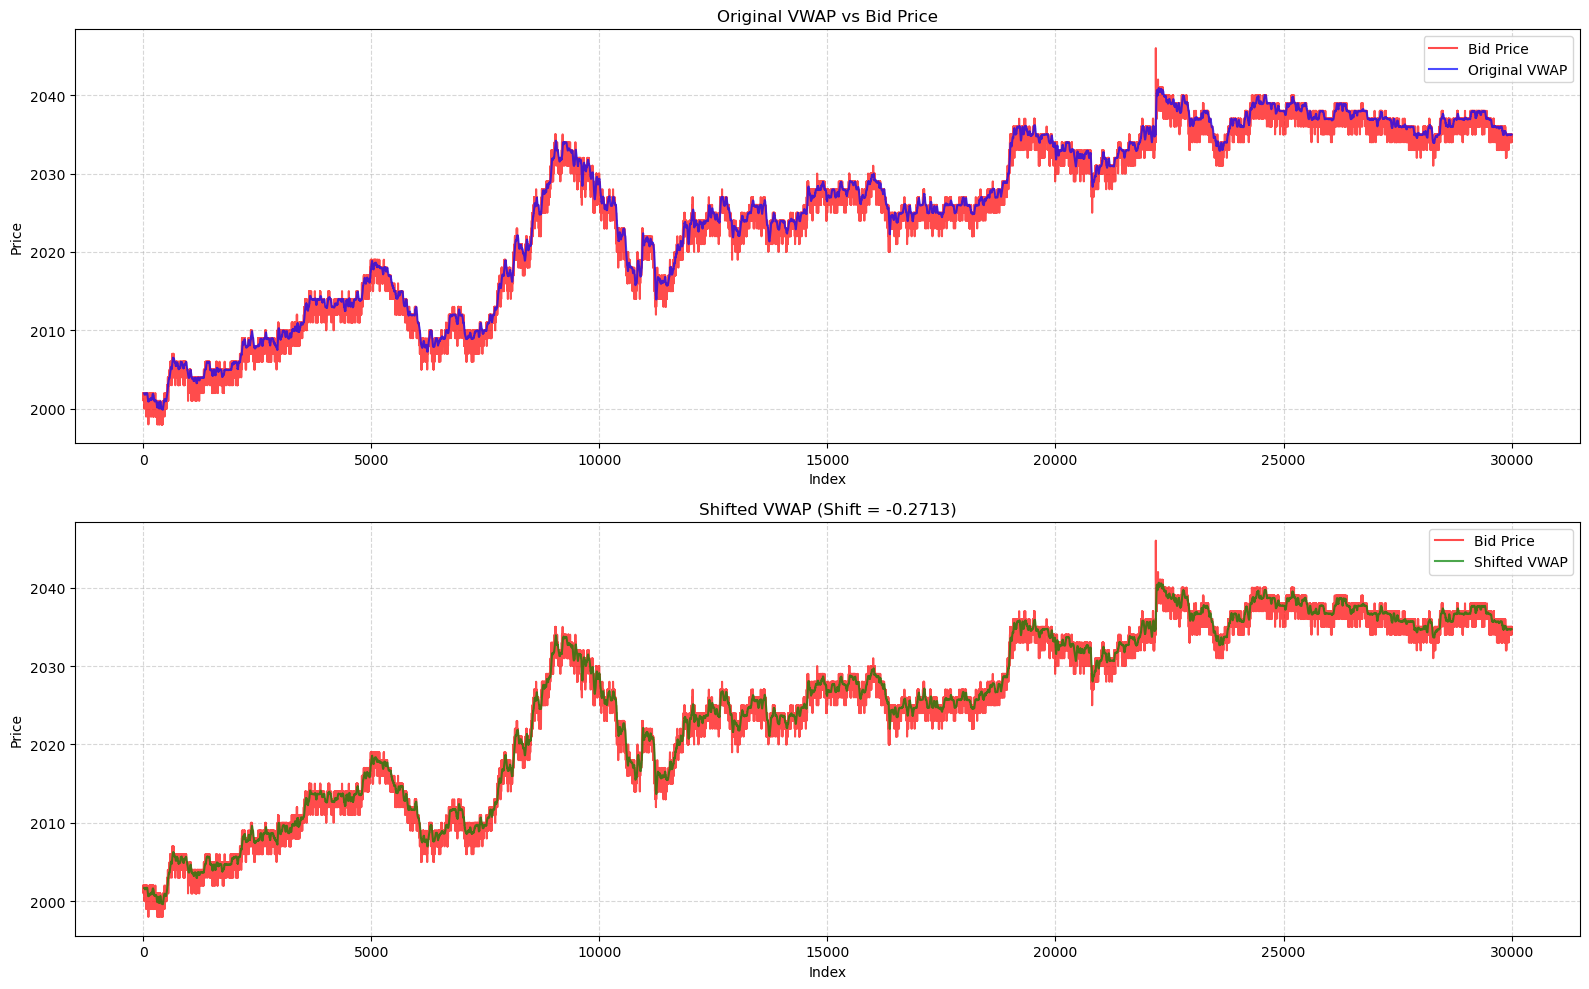

Optimal Shift: -0.2713
Original MSE: 0.8066
Shifted MSE: 0.7330
Improvement: 9.13%
Original Correlation: nan
Shifted Correlation: nan


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Function to calculate the mean squared error between shifted VWAP and bid price
def calculate_mse(a, vwap, bid_price):
    shifted_vwap = vwap + a
    return np.mean((shifted_vwap - bid_price)**2)

# Find the optimal shift
def find_optimal_shift(vwap, bid_price):
    result = minimize_scalar(lambda a: calculate_mse(a, vwap, bid_price))
    return result.x

# Identify the VWAP column
vwap_columns = [col for col in data_KELP.columns if col.startswith('VWAP_')]
vwap_col = "VWAP_ask_price_1_ask_volume_1_25"  # Choose the first VWAP column

# Calculate the optimal shift
optimal_shift = find_optimal_shift(data_KELP[vwap_col], data_KELP['ask_price_1'])

# Detailed visualization
plt.figure(figsize=(16, 10))

# Subplot 1: Original Data
plt.subplot(2, 1, 1)
plt.plot(data_KELP.index, data_KELP['ask_price_1'], label='Bid Price', color='red', alpha=0.7)
plt.plot(data_KELP.index, data_KELP[vwap_col], label='Original VWAP', color='blue', alpha=0.7)
plt.title('Original VWAP vs Bid Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Subplot 2: Shifted VWAP
plt.subplot(2, 1, 2)
plt.plot(data_KELP.index, data_KELP['ask_price_1'], label='Bid Price', color='red', alpha=0.7)
plt.plot(data_KELP.index, data_KELP[vwap_col] + optimal_shift, label='Shifted VWAP', color='green', alpha=0.7)
plt.title(f'Shifted VWAP (Shift = {optimal_shift:.4f})')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Calculate and print error metrics
original_mse = calculate_mse(0, data_KELP[vwap_col], data_KELP['ask_price_1'])
shifted_mse = calculate_mse(optimal_shift, data_KELP[vwap_col], data_KELP['ask_price_1'])

print(f"Optimal Shift: {optimal_shift:.4f}")
print(f"Original MSE: {original_mse:.4f}")
print(f"Shifted MSE: {shifted_mse:.4f}")
print(f"Improvement: {(original_mse - shifted_mse) / original_mse * 100:.2f}%")

# Calculate correlation before and after shifting
original_correlation = np.corrcoef(data_KELP[vwap_col], data_KELP['ask_price_1'])[0, 1]
shifted_correlation = np.corrcoef(data_KELP[vwap_col] + optimal_shift, data_KELP['ask_price_1'])[0, 1]

print(f"Original Correlation: {original_correlation:.4f}")
print(f"Shifted Correlation: {shifted_correlation:.4f}")

In [10]:
vwap_col

NameError: name 'vwap_col' is not defined

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, skewnorm, kstest


data_KELP["fitted_values"]  = data_KELP[vwap_col] #+ optimal_shift
data_KELP_fitted_df = data_KELP.iloc[data_KELP["fitted_values"].dropna().index]
data_KELP_fitted_df


# Calculate noise and add it as a new column
data_KELP_fitted_df["noise"] = data_KELP_fitted_df["ask_price_1"] - data_KELP_fitted_df["fitted_values"]

# Print summary statistics for the noise
print(data_KELP_fitted_df["noise"].describe())

# Extract noise values
noise = data_KELP_fitted_df["noise"].values

# Plot histogram of noise
plt.figure(figsize=(12, 6))
counts, bins, _ = plt.hist(noise, bins=50, density=True, alpha=0.5, label='Noise Histogram')

# Fit a normal distribution to the noise data
mu, sigma = norm.fit(noise)
x = np.linspace(bins[0], bins[-1], 200)
pdf_normal = norm.pdf(x, mu, sigma)
plt.plot(x, pdf_normal, 'r--', linewidth=2, label='Normal Fit')

# Fit a skew-normal distribution to the noise data
a, loc, scale = skewnorm.fit(noise)
pdf_skewnorm = skewnorm.pdf(x, a, loc, scale)
plt.plot(x, pdf_skewnorm, 'g-', linewidth=2, label='Skew-Normal Fit')

# Final touches on the plot
plt.title('Noise Distribution with Normal and Skew-Normal Fits')
plt.xlabel('Noise')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ----- Evaluate Goodness of Fit -----
# 1. Kolmogorov-Smirnov Tests
ks_normal = kstest(noise, 'norm', args=(mu, sigma))
ks_skew = kstest(noise, 'skewnorm', args=(a, loc, scale))
print("\nKolmogorov-Smirnov Test Results:")
print("Normal Distribution: D = {:.4f}, p-value = {:.4f}".format(ks_normal.statistic, ks_normal.pvalue))
print("Skew-Normal Distribution: D = {:.4f}, p-value = {:.4f}".format(ks_skew.statistic, ks_skew.pvalue))

# 2. Log-Likelihood and AIC Calculation
# Compute the log-likelihoods over the noise data
ll_normal = np.sum(np.log(norm.pdf(noise, mu, sigma)))
ll_skew = np.sum(np.log(skewnorm.pdf(noise, a, loc, scale)))

# Number of parameters for each model: normal has 2, skew-normal has 3
k_normal = 2
k_skew = 3

# Calculate AIC: AIC = 2*k - 2*log-likelihood. Lower AIC implies a better trade-off between goodness-of-fit and model complexity.
aic_normal = 2 * k_normal - 2 * ll_normal
aic_skew = 2 * k_skew - 2 * ll_skew

print("\nAkaike Information Criterion (AIC):")
print("Normal Distribution AIC: {:.2f}".format(aic_normal))
print("Skew-Normal Distribution AIC: {:.2f}".format(aic_skew))



NameError: name 'data_KELP' is not defined

In [12]:
scale

NameError: name 'scale' is not defined

In [13]:
import numpy as np
from scipy.stats import skewnorm


# Calculate delta for the skew-normal distribution
delta = a / np.sqrt(1 + a**2)

# Compute theoretical mean (mu) of the skew-normal distribution:
#   mu = loc + scale * delta * sqrt(2/π)
mu = loc + scale * delta * np.sqrt(2 / np.pi)

# Compute theoretical standard deviation (sigma)
#   sigma = scale * sqrt(1 - (2*delta^2)/π)
sigma = scale * np.sqrt(1 - (2 * delta**2) / np.pi)

print("Derived Skew-Normal Statistics:")
print(f"  Mean (mu): {mu:.4f}")
print(f"  Std (sigma): {sigma:.4f}")

# Create an array of z-scores with a granularity of 0.25
z_values = np.arange(-3.0, 3.0 + 0.25, 0.25)

# Create a dictionary to store the mapping from z-score to cumulative probability
confidence_levels = {}

for z in z_values:
    # Compute the corresponding x-value in the skew-normal distribution
    x_value = mu + z * sigma
    # Compute the cumulative probability at x_value using the skew-normal CDF
    p = skewnorm.cdf(x_value, a, loc, scale)
    confidence_levels[z] = p

# Print the dictionary of confidence levels
print("\nConfidence Levels (z-score -> Probability):")
for z, p in confidence_levels.items():
    print(f"{z:5.2f}: {p:.3f}")


NameError: name 'a' is not defined

## Analysis SQUID_INK

### Values

In [7]:
data_SQUID_INK.describe()

,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
count,30000.000000,30000.000000,6486.000000,6486.000000,493.000000,493.000000,30000.000000,30000.000000,7531.000000,7531.000000,583.000000,583.000000,30000.000000,30000.0
mean,1969.778900,21.220367,1970.212303,24.276904,1973.091278,25.308316,1972.444633,20.357567,1974.354402,24.014474,1977.653516,24.108062,1971.111767,0.0
std,67.868614,10.261383,67.528949,6.824428,70.262818,4.746230,67.926538,10.147913,68.579047,6.954562,70.343780,5.982246,67.896204,0.0
min,1809.000000,1.000000,1811.000000,1.000000,1811.000000,1.000000,1811.000000,1.000000,1813.000000,1.000000,1818.000000,1.000000,1810.500000,0.0
25%,1935.000000,21.000000,1937.000000,22.000000,1937.000000,23.000000,1938.000000,9.000000,1939.000000,22.000000,1940.000000,22.000000,1936.500000,0.0
50%,1964.000000,25.000000,1964.000000,25.000000,1966.000000,26.000000,1966.000000,24.000000,1968.000000,25.000000,1970.000000,25.000000,1965.000000,0.0
75%,1998.000000,28.000000,1998.750000,28.000000,2007.000000,28.000000,2001.000000,28.000000,2002.000000,28.000000,2006.000000,28.000000,1999.500000,0.0
max,2187.000000,40.000000,2185.000000,40.000000,2168.000000,36.000000,2189.000000,32.000000,2186.000000,32.000000,2185.000000,32.000000,2187.500000,0.0


In [12]:
import matplotlib.pyplot as plt

# Helper function for line plots
def plot_lines(ax, x, columns, title, y_label):
    for col in columns:
        ax.plot(x, data_SQUID_INK[col], label=col)
    ax.set_title(title)
    ax.set_xlabel("Index")
    ax.set_ylabel(y_label)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

# Helper function for bar plots (histograms)
def plot_bars(ax, x, columns, title, y_label, alphas=(0.7, 0.5)):
    for i, col in enumerate(columns):
        # Cycle through alphas if more than two columns
        ax.bar(x, data_SQUID_INK[col], label=col, alpha=alphas[i % len(alphas)])
    ax.set_title(title)
    ax.set_xlabel("Index")
    ax.set_ylabel(y_label)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

# Get the x-axis data (assumed to be the dataframe index)
x = data_SQUID_INK.index

# Identify relevant columns using list comprehensions
bid_price_cols = [col for col in data_SQUID_INK.columns if col.startswith('bid_price_1')]
ask_price_cols = [col for col in data_SQUID_INK.columns if col.startswith('ask_price_1')]
bid_volume_cols = [col for col in data_SQUID_INK.columns if col.startswith('bid_volume_1')]
ask_volume_cols = [col for col in data_SQUID_INK.columns if col.startswith('ask_volume_1')]

# Create a figure with 4 subplots arranged vertically
fig, axs = plt.subplots(4, 1, figsize=(15, 20))

# Plot Bid Prices using line plots
plot_lines(axs[0], x, bid_price_cols, "Bid Prices", "Price")

# Plot Bid Volumes as histograms (using the first two volume columns, if available)
plot_bars(axs[1], x, bid_volume_cols[:2], "Bid Volumes", "Volume")

# Plot Ask Prices using line plots
plot_lines(axs[2], x, ask_price_cols, "Ask Prices", "Price")

# Plot Ask Volumes as histograms (using the first two volume columns, if available)
plot_bars(axs[3], x, ask_volume_cols[:2], "Ask Volumes", "Volume")

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

c:\Users\cam42\miniconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


Error in callback <function _draw_all_if_interactive at 0x000002DA32E10F40> (for post_execute):


: 

: 

Best VWAP Performance:
R-squared: 0.9954
Window Size: 25
Price Column: bid_price_1
Volume Column: bid_volume_1


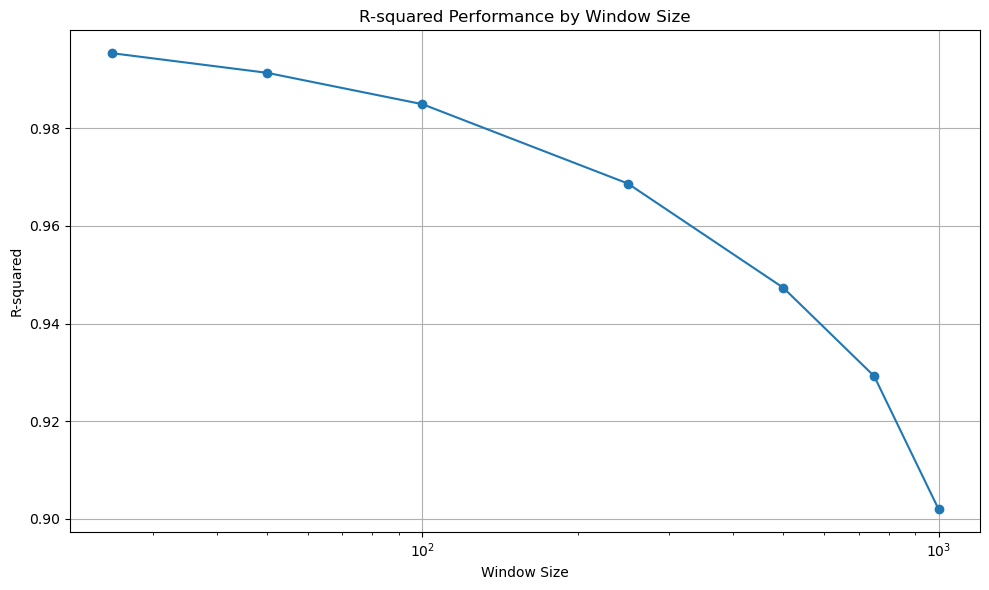

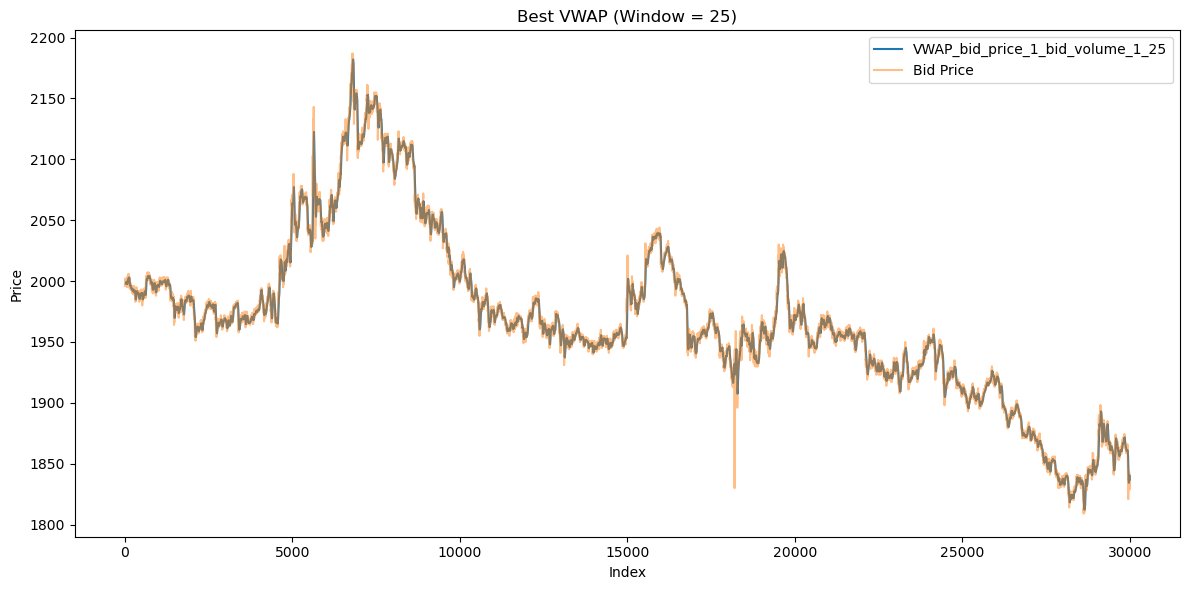

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Calculate VWAPs for different window sizes
def calculate_vwap(df, price_col, volume_col, window):
    vwap = (df[price_col] * df[volume_col]).rolling(window=window).sum() / \
           df[volume_col].rolling(window=window).sum()
    return vwap

# Prepare data for prediction
def prepare_prediction_data(df, vwap_cols, target_col):
    X = df[vwap_cols].values[:-1]
    y = df[target_col].values[1:]
    return X, y

# Evaluate VWAP prediction performance
def evaluate_vwap_prediction(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'Coefficients': model.coef_
    }

# Window sizes to test
window_sizes = [25, 50, 100, 250, 500, 750, 1000]

# Prepare to store results
performance_results = []

# Target column to predict
target_col = 'bid_price_1'

# Combinations to test
price_columns = ['bid_price_1', 'ask_price_1']
volume_columns = ['bid_volume_1', 'ask_volume_1']

# Comprehensive testing of VWAP windows
best_performance = {
    'best_r2': -np.inf,
    'best_window': None,
    'best_price_col': None,
    'best_volume_col': None
}

for price_col in price_columns:
    for volume_col in volume_columns:
        vwap_results = []
        
        for window in window_sizes:
            # Calculate VWAP
            vwap_col_name = f'VWAP_{price_col}_{volume_col}_{window}'
            data_SQUID_INK[vwap_col_name] = calculate_vwap(data_SQUID_INK, price_col, volume_col, window)
            
            # Prepare clean data
            data_clean = data_SQUID_INK.dropna(subset=[vwap_col_name, target_col])
            
            # Prepare for prediction
            X, y = prepare_prediction_data(data_clean, [vwap_col_name], target_col)
            
            # Evaluate prediction
            if len(X) > 0:
                results = evaluate_vwap_prediction(X, y)
                
                # Store results
                result_entry = {
                    'price_col': price_col,
                    'volume_col': volume_col,
                    'window': window,
                    'MSE': results['MSE'],
                    'MAE': results['MAE'],
                    'R2': results['R2']
                }

                vwap_results.append(result_entry)
                
                # Track best performance
                if results['R2'] > best_performance['best_r2']:
                    best_performance['best_r2'] = results['R2']
                    best_performance['best_window'] = window
                    best_performance['best_price_col'] = price_col
                    best_performance['best_volume_col'] = volume_col

# Print detailed results
print("Best VWAP Performance:")
print(f"R-squared: {best_performance['best_r2']:.4f}")
print(f"Window Size: {best_performance['best_window']}")
print(f"Price Column: {best_performance['best_price_col']}")
print(f"Volume Column: {best_performance['best_volume_col']}")

# Visualize performance across windows
import matplotlib.pyplot as plt

# Prepare data for plotting
windows = [result['window'] for result in vwap_results]
r2_scores = [result['R2'] for result in vwap_results]

plt.figure(figsize=(10, 6))
plt.plot(windows, r2_scores, marker='o')
plt.title('R-squared Performance by Window Size')
plt.xlabel('Window Size')
plt.ylabel('R-squared')
plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate and plot the best VWAP
best_vwap_col = f'VWAP_{best_performance["best_price_col"]}_{best_performance["best_volume_col"]}_{best_performance["best_window"]}'

plt.figure(figsize=(12, 6))
plt.plot(data_SQUID_INK.index, data_SQUID_INK[best_vwap_col], label=best_vwap_col)
plt.plot(data_SQUID_INK.index, data_SQUID_INK['bid_price_1'], label='Bid Price', alpha=0.5)
plt.title(f'Best VWAP (Window = {best_performance["best_window"]})')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

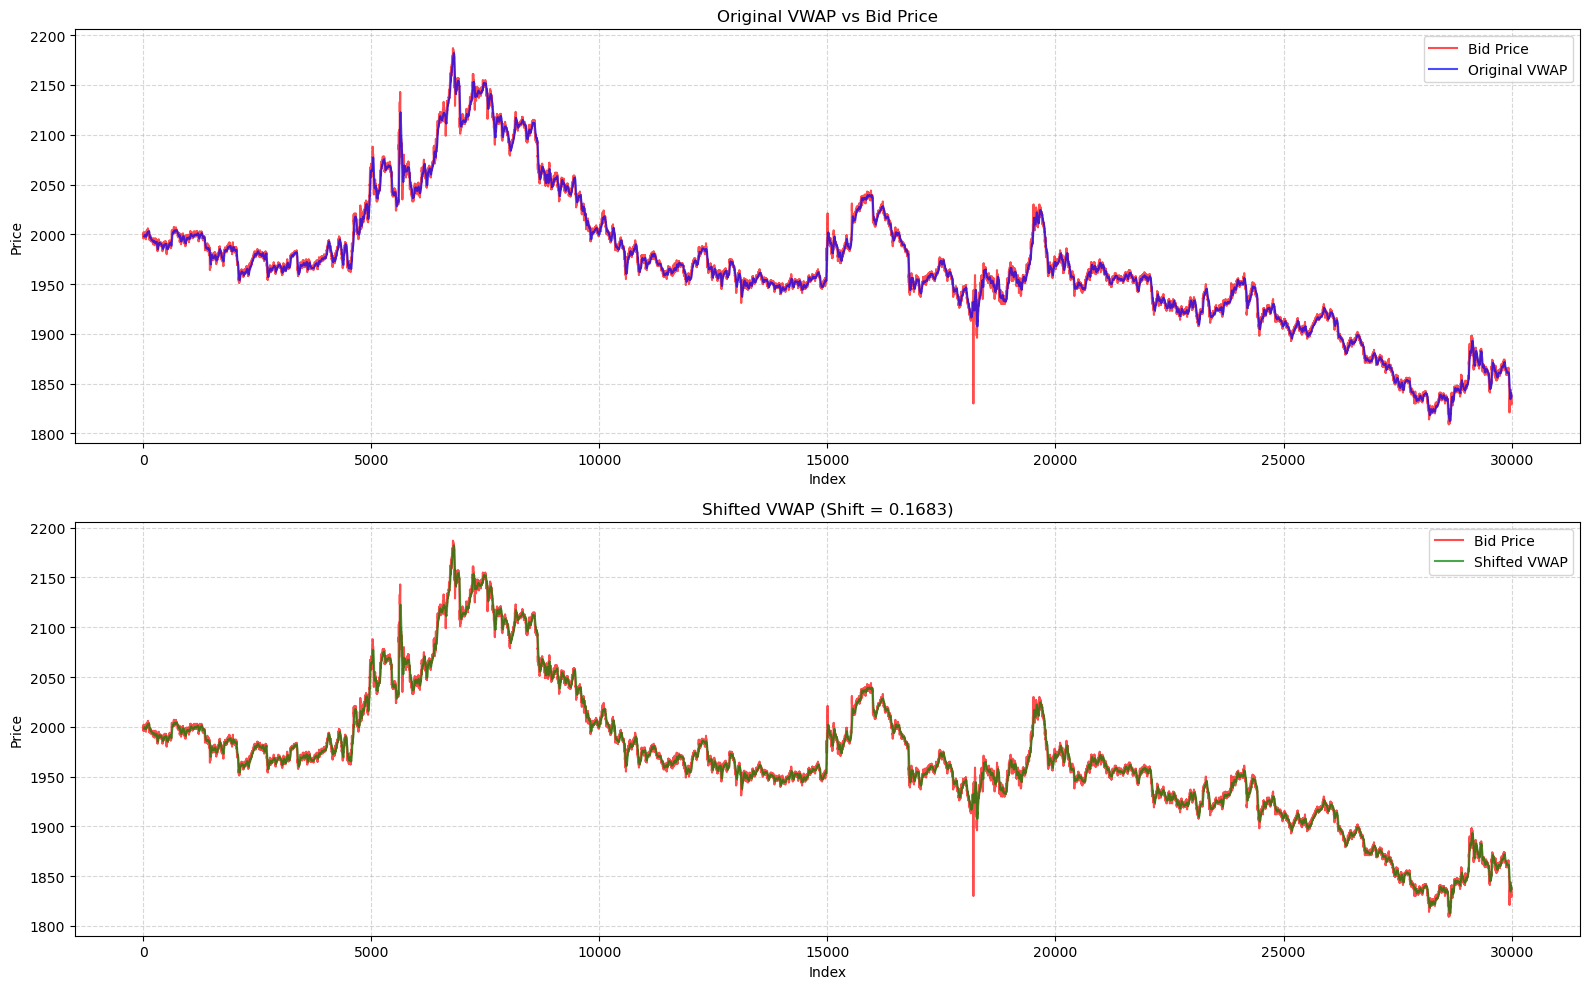

Optimal Shift: 0.1683
Original MSE: 17.5324
Shifted MSE: 17.5041
Improvement: 0.16%
Original Correlation: nan
Shifted Correlation: nan


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Function to calculate the mean squared error between shifted VWAP and bid price
def calculate_mse(a, vwap, bid_price):
    shifted_vwap = vwap + a
    return np.mean((shifted_vwap - bid_price)**2)

# Find the optimal shift
def find_optimal_shift(vwap, bid_price):
    result = minimize_scalar(lambda a: calculate_mse(a, vwap, bid_price))
    return result.x

# Identify the VWAP column
vwap_columns = [col for col in data_SQUID_INK.columns if col.startswith('VWAP_')]
vwap_col = "VWAP_bid_price_1_bid_volume_1_25"  # Choose the first VWAP column

# Calculate the optimal shift
optimal_shift = find_optimal_shift(data_SQUID_INK[vwap_col], data_SQUID_INK['bid_price_1'])

# Detailed visualization
plt.figure(figsize=(16, 10))

# Subplot 1: Original Data
plt.subplot(2, 1, 1)
plt.plot(data_SQUID_INK.index, data_SQUID_INK['bid_price_1'], label='Bid Price', color='red', alpha=0.7)
plt.plot(data_SQUID_INK.index, data_SQUID_INK[vwap_col], label='Original VWAP', color='blue', alpha=0.7)
plt.title('Original VWAP vs Bid Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Subplot 2: Shifted VWAP
plt.subplot(2, 1, 2)
plt.plot(data_SQUID_INK.index, data_SQUID_INK['bid_price_1'], label='Bid Price', color='red', alpha=0.7)
plt.plot(data_SQUID_INK.index, data_SQUID_INK[vwap_col] + optimal_shift, label='Shifted VWAP', color='green', alpha=0.7)
plt.title(f'Shifted VWAP (Shift = {optimal_shift:.4f})')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Calculate and print error metrics
original_mse = calculate_mse(0, data_SQUID_INK[vwap_col], data_SQUID_INK['bid_price_1'])
shifted_mse = calculate_mse(optimal_shift, data_SQUID_INK[vwap_col], data_SQUID_INK['bid_price_1'])

print(f"Optimal Shift: {optimal_shift:.4f}")
print(f"Original MSE: {original_mse:.4f}")
print(f"Shifted MSE: {shifted_mse:.4f}")
print(f"Improvement: {(original_mse - shifted_mse) / original_mse * 100:.2f}%")

# Calculate correlation before and after shifting
original_correlation = np.corrcoef(data_SQUID_INK[vwap_col], data_SQUID_INK['bid_price_1'])[0, 1]
shifted_correlation = np.corrcoef(data_SQUID_INK[vwap_col] + optimal_shift, data_SQUID_INK['bid_price_1'])[0, 1]

print(f"Original Correlation: {original_correlation:.4f}")
print(f"Shifted Correlation: {shifted_correlation:.4f}")

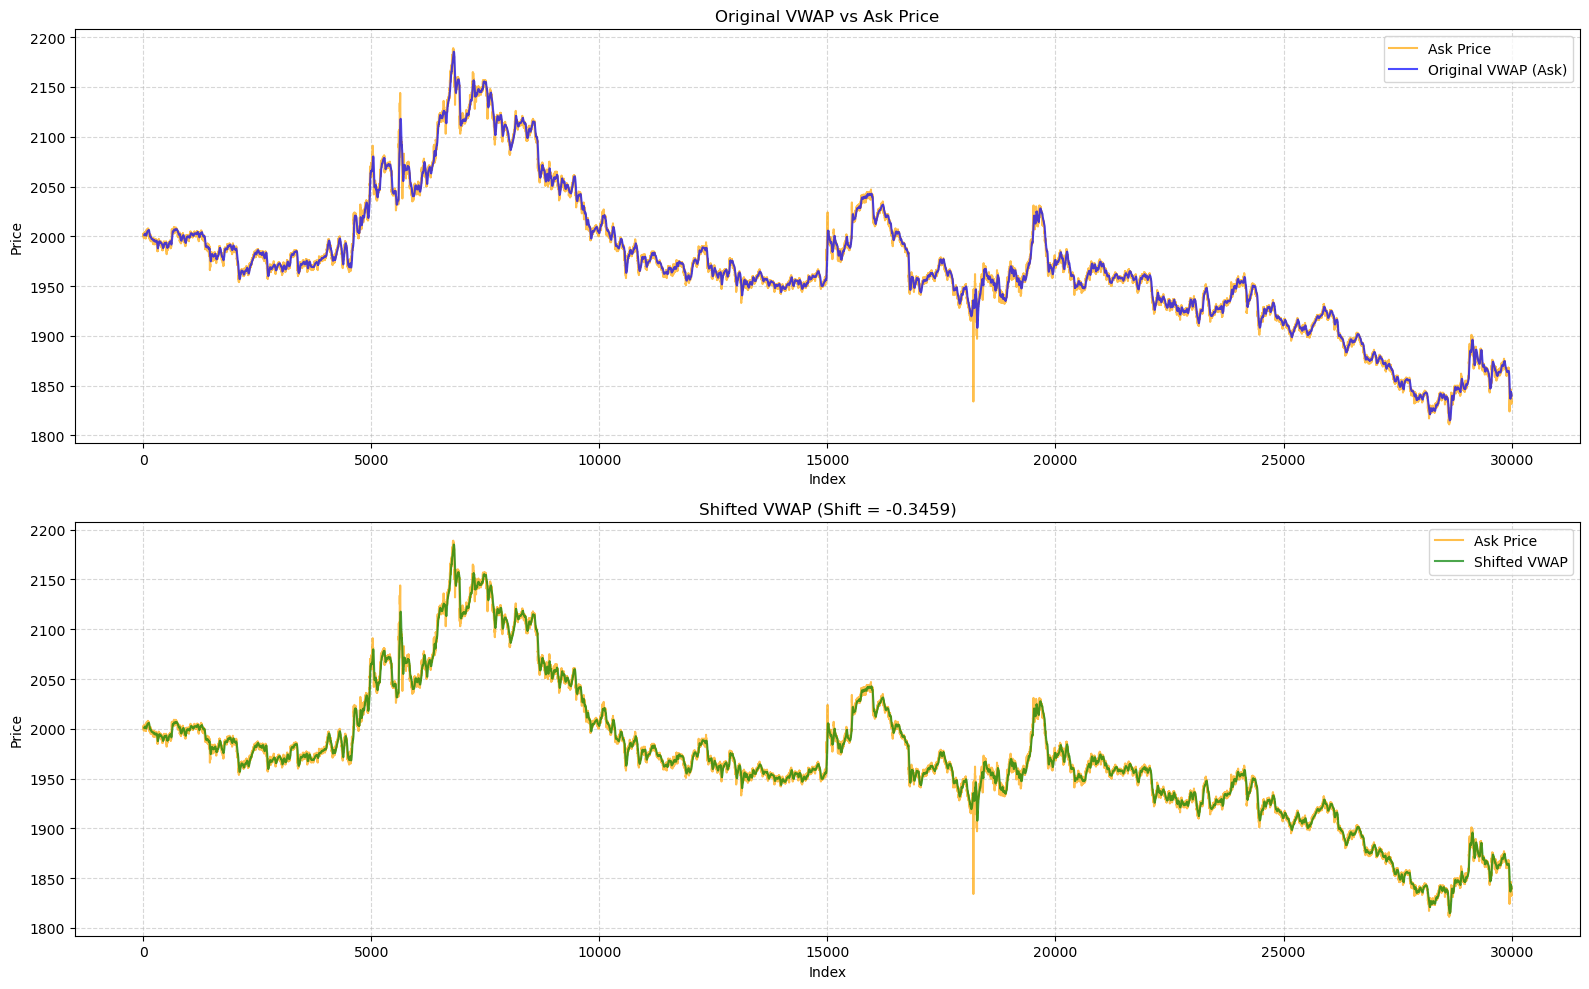

Optimal Shift (Ask): -0.3459
Original MSE (Ask): 17.7868
Shifted MSE (Ask): 17.6672
Improvement (Ask): 0.67%
Original Correlation (Ask): nan
Shifted Correlation (Ask): nan


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Function to calculate the mean squared error between shifted VWAP and ask price
def calculate_mse(a, vwap, ask_price):
    shifted_vwap = vwap + a
    return np.mean((shifted_vwap - ask_price)**2)

# Find the optimal shift
def find_optimal_shift(vwap, ask_price):
    result = minimize_scalar(lambda a: calculate_mse(a, vwap, ask_price))
    return result.x

# Identify the VWAP column for ask
vwap_col_ask = "VWAP_ask_price_1_ask_volume_1_25"  # Change this to your actual ask VWAP column

# Calculate the optimal shift
optimal_shift_ask = find_optimal_shift(data_SQUID_INK[vwap_col_ask], data_SQUID_INK['ask_price_1'])

# Detailed visualization
plt.figure(figsize=(16, 10))

# Subplot 1: Original Data
plt.subplot(2, 1, 1)
plt.plot(data_SQUID_INK.index, data_SQUID_INK['ask_price_1'], label='Ask Price', color='orange', alpha=0.7)
plt.plot(data_SQUID_INK.index, data_SQUID_INK[vwap_col_ask], label='Original VWAP (Ask)', color='blue', alpha=0.7)
plt.title('Original VWAP vs Ask Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Subplot 2: Shifted VWAP
plt.subplot(2, 1, 2)
plt.plot(data_SQUID_INK.index, data_SQUID_INK['ask_price_1'], label='Ask Price', color='orange', alpha=0.7)
plt.plot(data_SQUID_INK.index, data_SQUID_INK[vwap_col_ask] + optimal_shift_ask, label='Shifted VWAP', color='green', alpha=0.7)
plt.title(f'Shifted VWAP (Shift = {optimal_shift_ask:.4f})')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Calculate and print error metrics
original_mse_ask = calculate_mse(0, data_SQUID_INK[vwap_col_ask], data_SQUID_INK['ask_price_1'])
shifted_mse_ask = calculate_mse(optimal_shift_ask, data_SQUID_INK[vwap_col_ask], data_SQUID_INK['ask_price_1'])

print(f"Optimal Shift (Ask): {optimal_shift_ask:.4f}")
print(f"Original MSE (Ask): {original_mse_ask:.4f}")
print(f"Shifted MSE (Ask): {shifted_mse_ask:.4f}")
print(f"Improvement (Ask): {(original_mse_ask - shifted_mse_ask) / original_mse_ask * 100:.2f}%")

# Calculate correlation before and after shifting
original_correlation_ask = np.corrcoef(data_SQUID_INK[vwap_col_ask], data_SQUID_INK['ask_price_1'])[0, 1]
shifted_correlation_ask = np.corrcoef(data_SQUID_INK[vwap_col_ask] + optimal_shift_ask, data_SQUID_INK['ask_price_1'])[0, 1]

print(f"Original Correlation (Ask): {original_correlation_ask:.4f}")
print(f"Shifted Correlation (Ask): {shifted_correlation_ask:.4f}")


### Isolating the variations

In [122]:
vwap_col

'VWAP_bid_price_1_bid_volume_1_25'

count    29923.000000
mean         0.167462
std          4.186607
min        -97.622302
25%         -1.782245
50%          0.278912
75%          2.240769
max         57.485714
Name: noise, dtype: float64


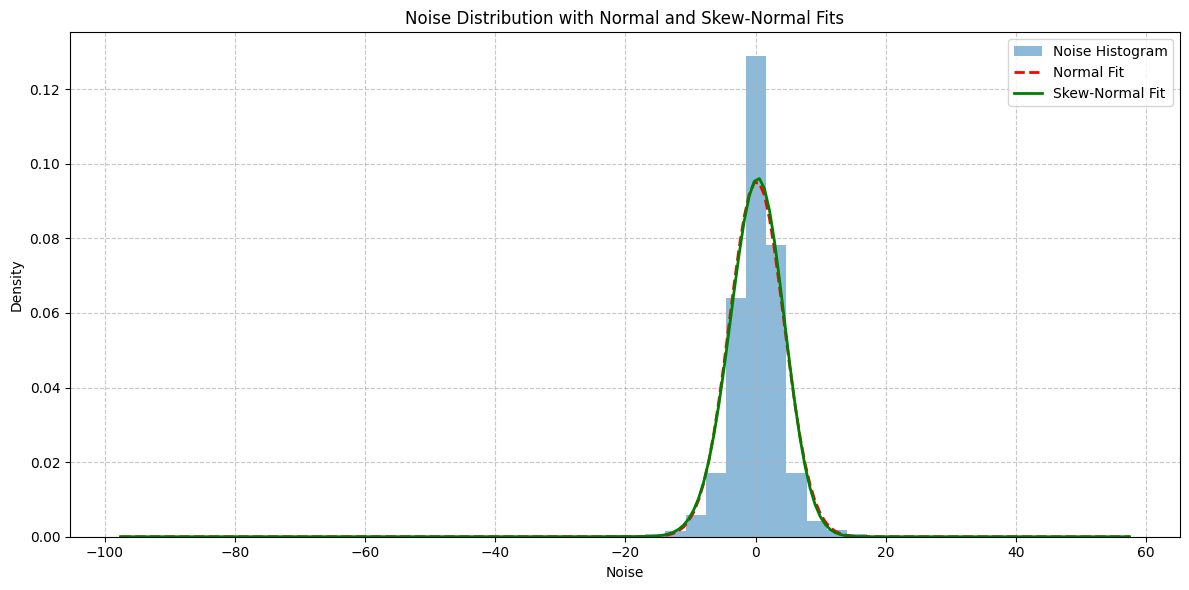


Kolmogorov-Smirnov Test Results:
Normal Distribution: D = 0.0753, p-value = 0.0000
Skew-Normal Distribution: D = 0.0729, p-value = 0.0000

Akaike Information Criterion (AIC):
Normal Distribution AIC: 170613.73
Skew-Normal Distribution AIC: 170336.48


In [123]:
data_SQUID_INK

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, skewnorm, kstest


data_SQUID_INK["fitted_values"]  = data_SQUID_INK[vwap_col].copy() #+ optimal_shift
data_SQUID_INK = data_SQUID_INK.loc[data_SQUID_INK["fitted_values"].notna()]


# Calculate noise and add it as a new column
data_SQUID_INK["noise"] = data_SQUID_INK["bid_price_1"] - data_SQUID_INK["fitted_values"]

# Print summary statistics for the noise
print(data_SQUID_INK["noise"].describe())

# Extract noise values
noise = data_SQUID_INK["noise"].values

# Plot histogram of noise
plt.figure(figsize=(12, 6))
counts, bins, _ = plt.hist(noise, bins=50, density=True, alpha=0.5, label='Noise Histogram')

# Fit a normal distribution to the noise data
mu, sigma = norm.fit(noise)
x = np.linspace(bins[0], bins[-1], 200)
pdf_normal = norm.pdf(x, mu, sigma)
plt.plot(x, pdf_normal, 'r--', linewidth=2, label='Normal Fit')

# Fit a skew-normal distribution to the noise data
a, loc, scale = skewnorm.fit(noise)
pdf_skewnorm = skewnorm.pdf(x, a, loc, scale)
plt.plot(x, pdf_skewnorm, 'g-', linewidth=2, label='Skew-Normal Fit')

# Final touches on the plot
plt.title('Noise Distribution with Normal and Skew-Normal Fits')
plt.xlabel('Noise')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ----- Evaluate Goodness of Fit -----
# 1. Kolmogorov-Smirnov Tests
ks_normal = kstest(noise, 'norm', args=(mu, sigma))
ks_skew = kstest(noise, 'skewnorm', args=(a, loc, scale))
print("\nKolmogorov-Smirnov Test Results:")
print("Normal Distribution: D = {:.4f}, p-value = {:.4f}".format(ks_normal.statistic, ks_normal.pvalue))
print("Skew-Normal Distribution: D = {:.4f}, p-value = {:.4f}".format(ks_skew.statistic, ks_skew.pvalue))

# 2. Log-Likelihood and AIC Calculation
# Compute the log-likelihoods over the noise data
ll_normal = np.sum(np.log(norm.pdf(noise, mu, sigma)))
ll_skew = np.sum(np.log(skewnorm.pdf(noise, a, loc, scale)))

# Number of parameters for each model: normal has 2, skew-normal has 3
k_normal = 2
k_skew = 3

# Calculate AIC: AIC = 2*k - 2*log-likelihood. Lower AIC implies a better trade-off between goodness-of-fit and model complexity.
aic_normal = 2 * k_normal - 2 * ll_normal
aic_skew = 2 * k_skew - 2 * ll_skew

print("\nAkaike Information Criterion (AIC):")
print("Normal Distribution AIC: {:.2f}".format(aic_normal))
print("Skew-Normal Distribution AIC: {:.2f}".format(aic_skew))



In [124]:
data_SQUID_INK["noise"].describe()

count    29923.000000
mean         0.167462
std          4.186607
min        -97.622302
25%         -1.782245
50%          0.278912
75%          2.240769
max         57.485714
Name: noise, dtype: float64

### First derivative

In [10]:
data_KELP_d1 = data_KELP.diff().copy()
data_KELP_d1.describe()

,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
count,29999.000000,29999.000000,1719.000000,1719.000000,13.000000,13.000000,29999.000000,29999.000000,2200.000000,2200.000000,30.000000,30.000000,29999.000000,29999.0
mean,0.001133,-0.000100,0.008726,-0.403723,-0.076923,-1.307692,0.001100,-0.000100,0.002727,-0.110455,0.166667,1.433333,0.001117,0.0
std,0.959337,13.952393,0.506574,9.787016,0.277350,4.460654,1.028609,14.203505,0.633312,10.908903,0.379049,7.916301,0.781493,0.0
min,-4.000000,-39.000000,-2.000000,-31.000000,-1.000000,-7.000000,-4.000000,-31.000000,-2.000000,-30.000000,0.000000,-9.000000,-4.000000,0.0
25%,0.000000,-6.000000,0.000000,-4.000000,0.000000,-5.000000,0.000000,-6.000000,0.000000,-4.000000,0.000000,-3.750000,-0.500000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,6.000000,0.000000,4.000000,0.000000,2.000000,0.000000,6.000000,0.000000,4.000000,0.000000,3.000000,0.500000,0.0
max,11.000000,39.000000,3.000000,35.000000,0.000000,6.000000,12.000000,31.000000,2.000000,31.000000,1.000000,27.000000,11.500000,0.0


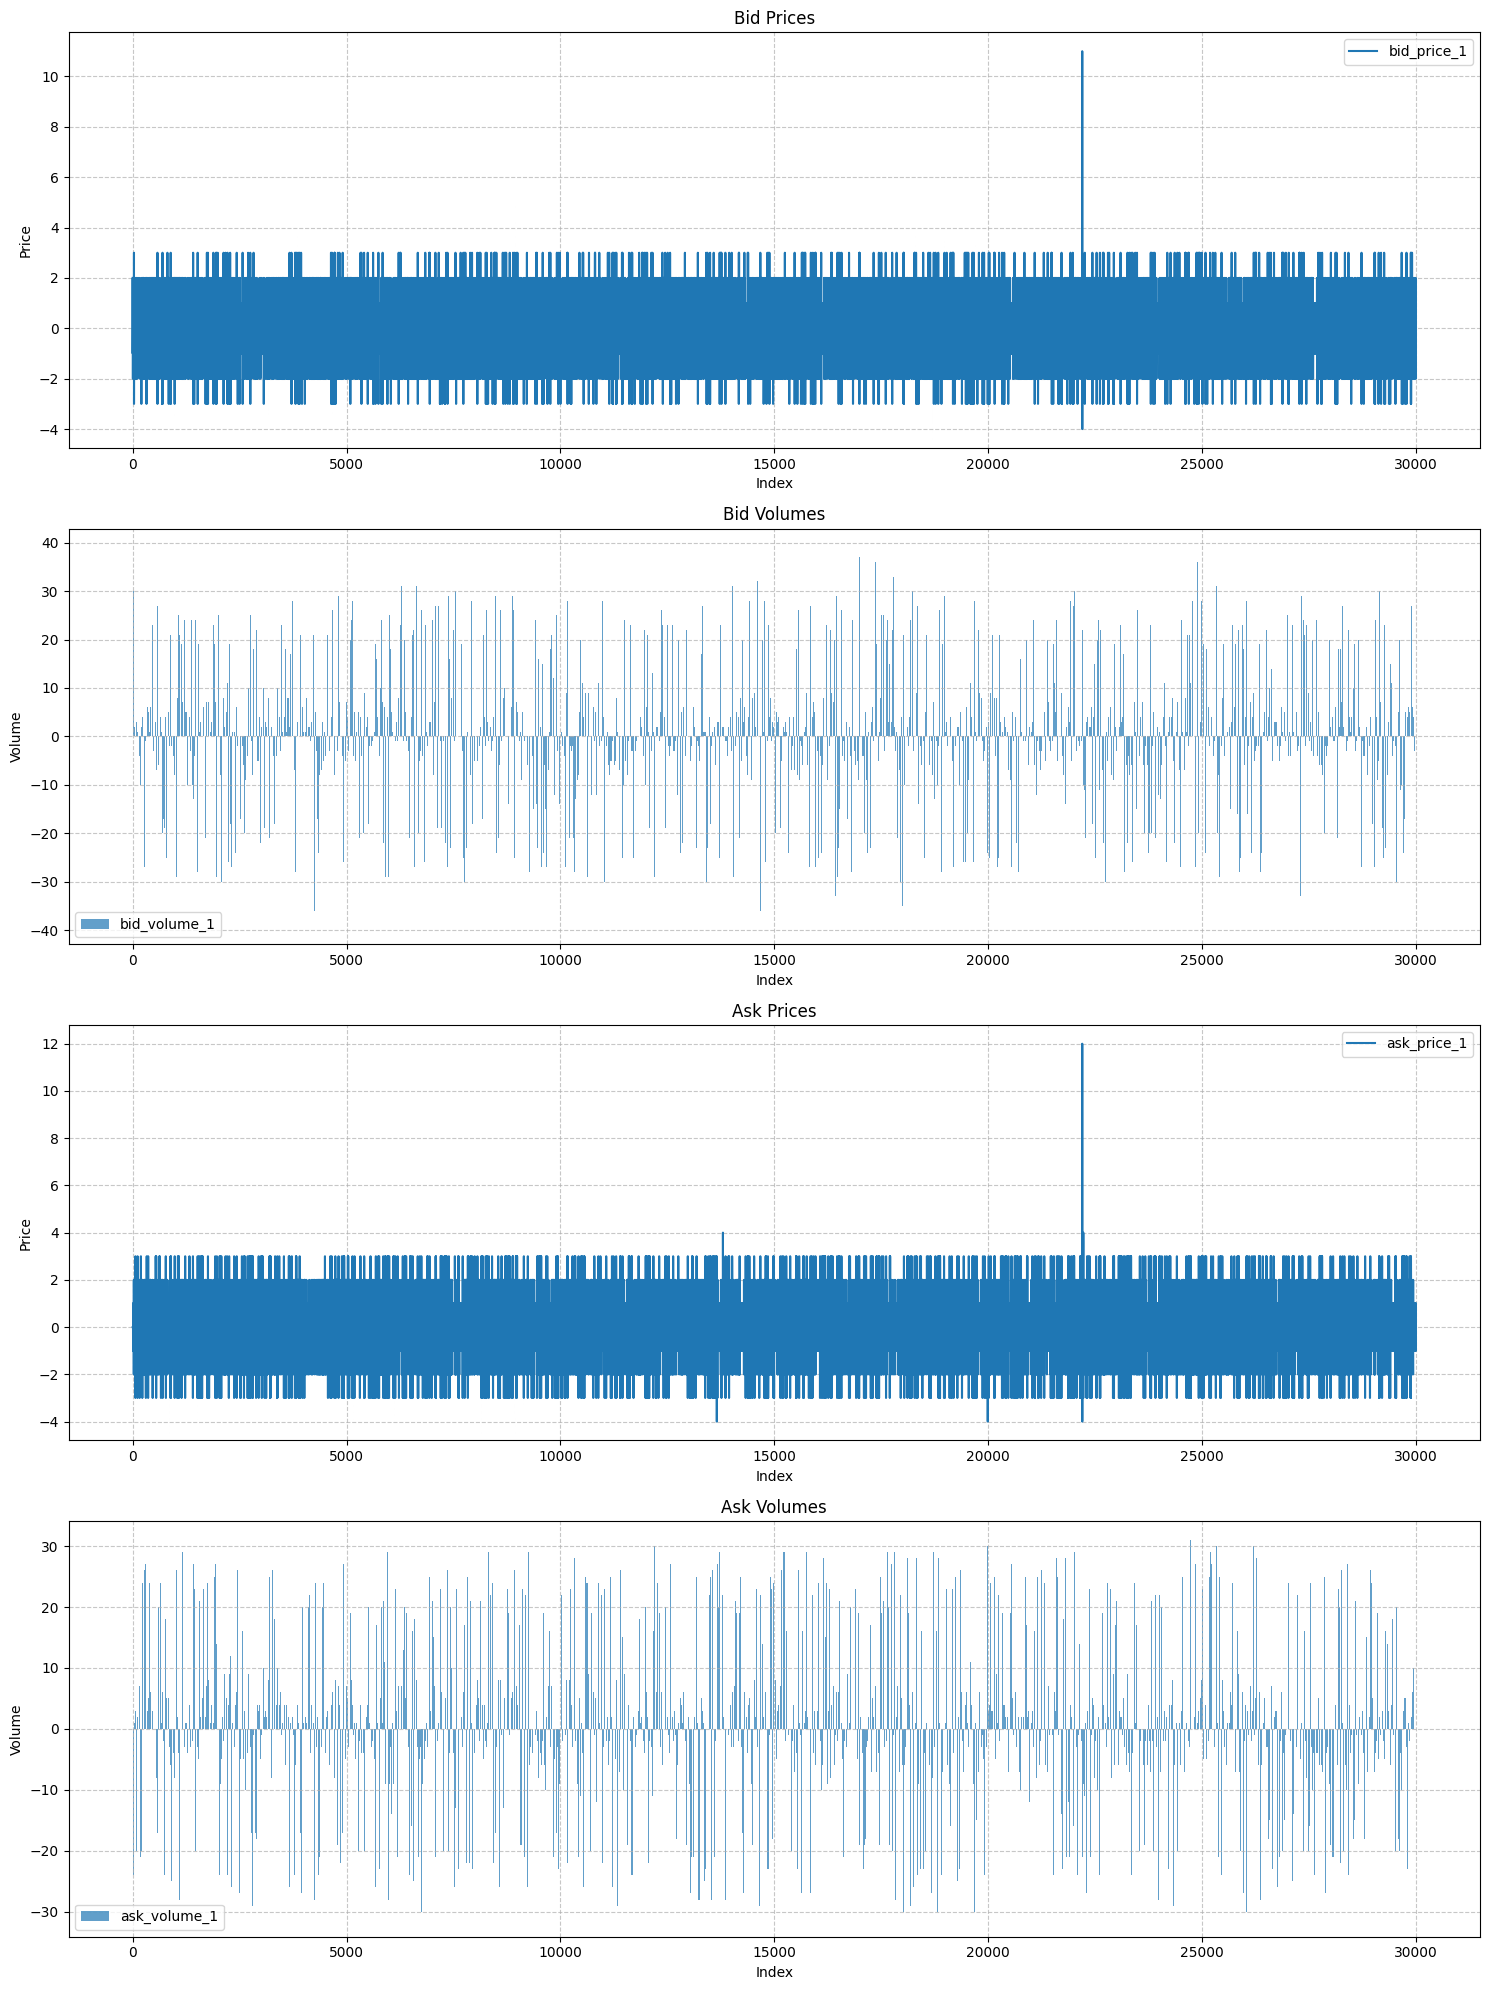

In [11]:
import matplotlib.pyplot as plt

# Helper function for line plots
def plot_lines(ax, x, columns, title, y_label):
    for col in columns:
        ax.plot(x, data_KELP_d1[col], label=col)
    ax.set_title(title)
    ax.set_xlabel("Index")
    ax.set_ylabel(y_label)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

# Helper function for bar plots (histograms)
def plot_bars(ax, x, columns, title, y_label, alphas=(0.7, 0.5)):
    for i, col in enumerate(columns):
        # Cycle through alphas if more than two columns
        ax.bar(x, data_KELP_d1[col], label=col, alpha=alphas[i % len(alphas)])
    ax.set_title(title)
    ax.set_xlabel("Index")
    ax.set_ylabel(y_label)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

# Get the x-axis data (assumed to be the dataframe index)
x = data_KELP_d1.index

# Identify relevant columns using list comprehensions
bid_price_cols = [col for col in data_KELP_d1.columns if col.startswith('bid_price_1')]
ask_price_cols = [col for col in data_KELP_d1.columns if col.startswith('ask_price_1')]
bid_volume_cols = [col for col in data_KELP_d1.columns if col.startswith('bid_volume_1')]
ask_volume_cols = [col for col in data_KELP_d1.columns if col.startswith('ask_volume_1')]

# Create a figure with 4 subplots arranged vertically
fig, axs = plt.subplots(4, 1, figsize=(15, 20))

# Plot Bid Prices using line plots
plot_lines(axs[0], x, bid_price_cols, "Bid Prices", "Price")

# Plot Bid Volumes as histograms (using the first two volume columns, if available)
plot_bars(axs[1], x, bid_volume_cols[:2], "Bid Volumes", "Volume")

# Plot Ask Prices using line plots
plot_lines(axs[2], x, ask_price_cols, "Ask Prices", "Price")

# Plot Ask Volumes as histograms (using the first two volume columns, if available)
plot_bars(axs[3], x, ask_volume_cols[:2], "Ask Volumes", "Volume")

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()
plt.show()


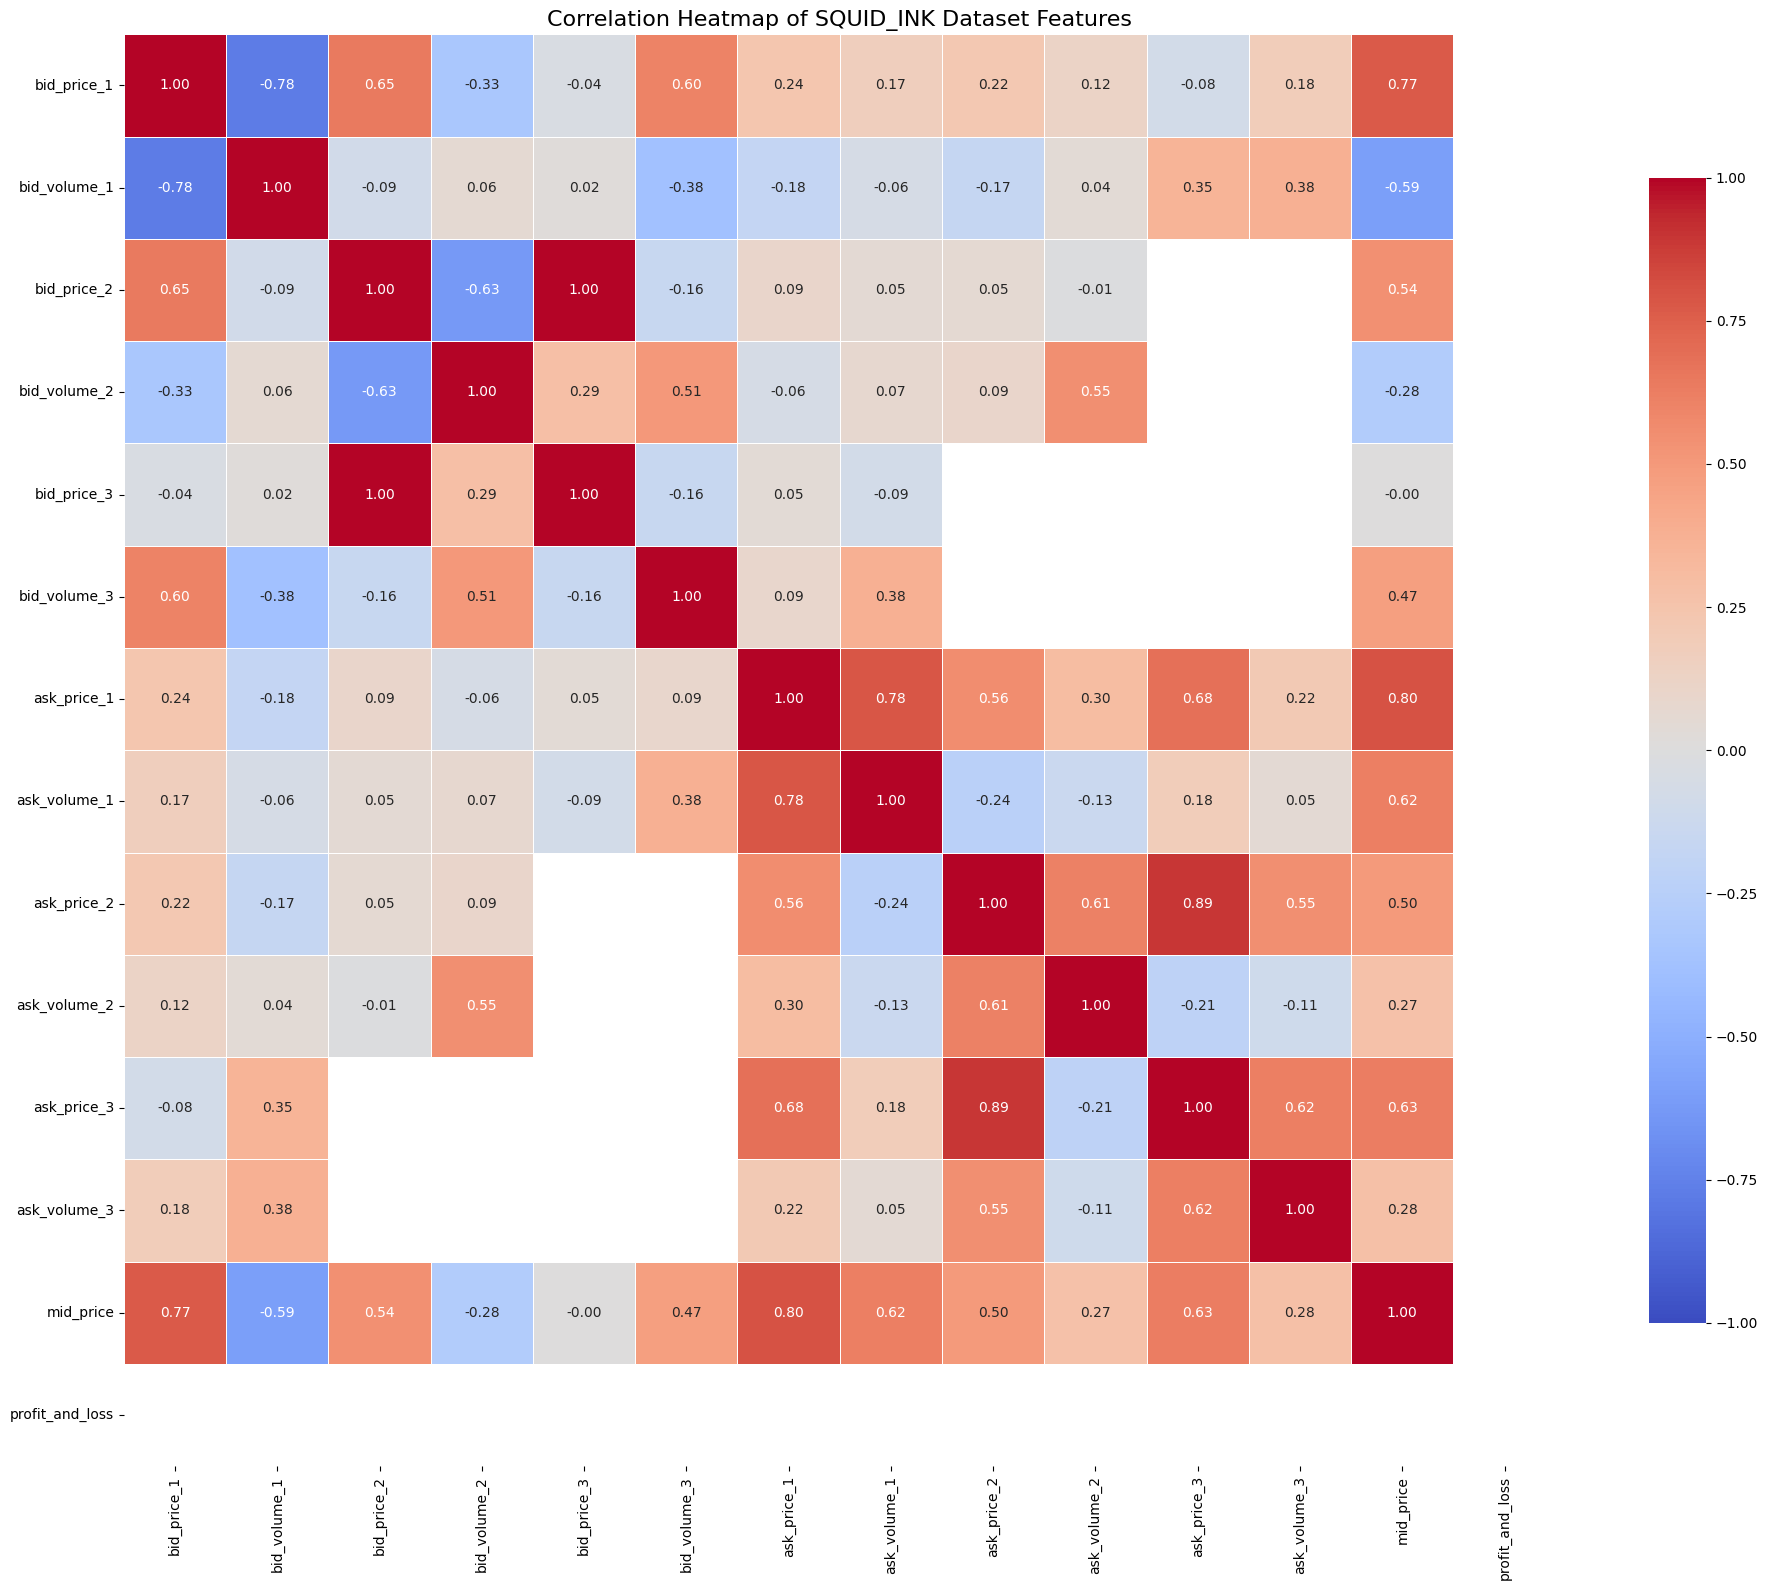

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the correlation matrix
correlation_matrix = data_KELP_d1.corr()

# Create a large figure to accommodate many features
plt.figure(figsize=(20, 16))

# Create the heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Show the numeric correlation values
            cmap='coolwarm',  # Blue-white-red color map (negative to positive correlations)
            center=0,  # Center the colormap at 0
            vmin=-1, 
            vmax=1,  # Correlation values range from -1 to 1
            square=True,  # Make each cell square
            linewidths=0.5,  # Add lines between cells
            cbar_kws={"shrink": .8},  # Slightly reduce the size of the colorbar
            fmt='.2f')  # Format correlation values to 2 decimal places

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Add a title
plt.title('Correlation Heatmap of SQUID_INK Dataset Features', fontsize=16)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

## Analysis KELP - SQUID_INK